<a href="https://colab.research.google.com/github/rvalarezo/data_analytics/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/rvalarezo/data_analytics/refs/heads/main/exercise_data.csv"
df =  pd.read_csv(url)

In [4]:
df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,01-12-2020,110,130,409.1
1,60,02-12-2020,117,145,479.0
2,60,03-12-2020,103,135,340.0
3,45,04-12-2020,109,175,282.4
4,45,05-12-2020,117,148,406.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [6]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


In [7]:
df.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,2


In [8]:
df.isnull().sum()/len(df)*100

,0
Duration,0.000
Date,3.125
Pulse,0.000
Maxpulse,0.000
Calories,6.250


In [9]:
df.shape

(32, 5)

Working with Date & Time

In [10]:
from datetime import datetime,date

In [11]:
print(date.today().year)
print(date.today().month)
print(date.today())

2025
1
2025-01-28


In [12]:
current_time = datetime.now()
print(current_time.strftime("%H:%M:%S"))

02:23:13


In [13]:
df["DiferenceofPulse"] = df["Maxpulse"]-df["Pulse"]
df.head()

,Duration,Date,Pulse,Maxpulse,Calories,DiferenceofPulse
0,60,01-12-2020,110,130,409.1,20
1,60,02-12-2020,117,145,479.0,28
2,60,03-12-2020,103,135,340.0,32
3,45,04-12-2020,109,175,282.4,66
4,45,05-12-2020,117,148,406.0,31


In [14]:
df['Calories'] = df['Calories'].fillna(df['Calories'].mean())
print("Mean of Maxpulse is: ",df["Maxpulse"].mean())
print("Median of Maxpulse is:  ",df["Maxpulse"].median())
print("Mode of Maxpulse is:  ",df["Maxpulse"].mode())

Mean of Maxpulse is:  128.5
Median of Maxpulse is:   127.5
Mode of Maxpulse is:   0    120
Name: Maxpulse, dtype: int64


In [15]:
df.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,0
DiferenceofPulse,0


**Data reduction**

In [16]:
data_cleaned = df.dropna()


In [ ]:
data_cleaned.isnull().sum()

,0
Duration,0
Date,0
Pulse,0
Maxpulse,0
Calories,0
DiferenceofPulse,0


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
tempData = pd.DataFrame({
    "Age":[25,30,np.nan,35,40],
    "Salary":[50000,60000,55000,np.nan,65000],
    "City":['New York','San Francisco',np.nan,'Chicago','New York']
})
#Question: Fill the missing values, for age -> use mean, for salary: use median, for city use Mode
tempData

,Age,Salary,City
0,25.0,50000.0,New York
1,30.0,60000.0,San Francisco
2,NaN,55000.0,NaN
3,35.0,NaN,Chicago
4,40.0,65000.0,New York


In [26]:
tempData.isnull().sum()

,0
Age,1
Salary,1
City,1


In [27]:
tempData['Age'] = tempData['Age'].fillna(tempData['Age'].mean())

In [28]:
tempData['Salary'] = tempData['Salary'].fillna(tempData['Salary'].median())

In [29]:
tempData['City'] = tempData['City'].fillna(tempData['City'].mode()[0])

In [30]:
tempData.isnull().sum()

,0
Age,0
Salary,0
City,0


In [31]:
tempData

,Age,Salary,City
0,25.0,50000.0,New York
1,30.0,60000.0,San Francisco
2,32.5,55000.0,New York
3,35.0,57500.0,Chicago
4,40.0,65000.0,New York


array([<Axes: >, <Axes: >], dtype=object)

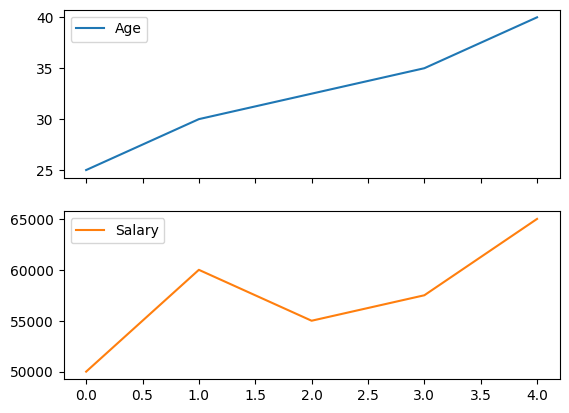

In [32]:
tempData.plot(kind='line',subplots=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

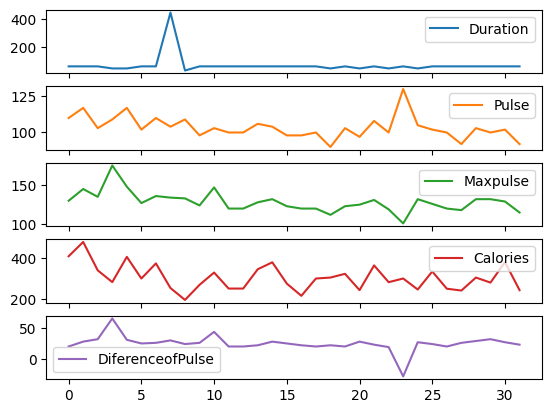

In [33]:
df.plot(kind='line',subplots=True)

<Axes: >

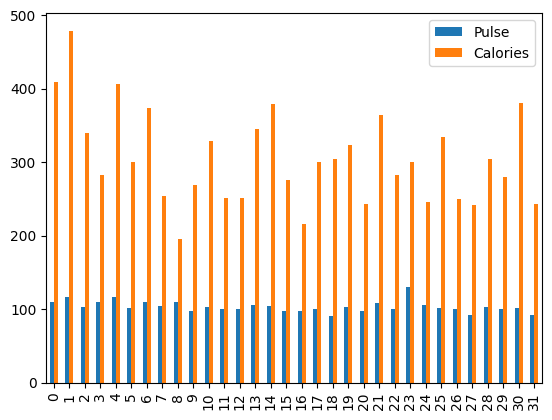

In [35]:
barData = df[['Pulse','Calories']]
barData.plot(kind='bar')